In [1]:
import logging
import os
import pandas as pd
import json

from pathlib import Path

from experiments.tad_help import RTRunner

%load_ext autoreload
%autoreload 2

# Disable logging of the program in the notebook
os.environ["LOGLEVEL"] = "CRITICAL"

logging.basicConfig()
logging.root.setLevel(logging.CRITICAL)
logging.basicConfig(level=logging.CRITICAL)

logger = logging.getLogger('__main__')
logger.setLevel(os.environ.get("LOGLEVEL", logging.CRITICAL))

pybooklogger = logging.getLogger('pybook')
pybooklogger.setLevel(logging.CRITICAL)

%aimport setup

from setup import *

# Track Layout
Calculate the layout of the dutch railway system


In [2]:
layout_file =   "../data/prorail/parsed/netherlands-schiphol.json"
layout = Layout(layout_file)

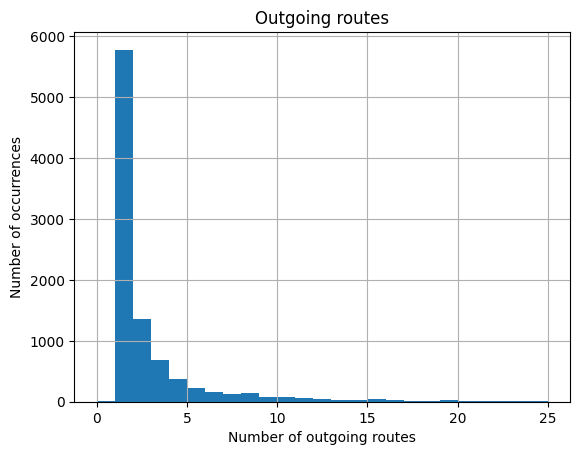

In [3]:
edges_df = pd.DataFrame({"Outgoing routes": [len(n.outgoing) for n in layout.g_block.nodes.values() if len(n.outgoing) <= 25]})
hist = edges_df.hist(bins=25, )
plt.xlabel("Number of outgoing routes")
plt.ylabel("Number of occurrences")
plt.show()

# Experiment Runtime
Take a route of an agent with many stops, and run from start to every stop as an experiment

In [4]:
scenario_files = Path("../data/prorail/scenarios/RT")
save_dir = r"C:\Users\erick\Documents\uni\Thesis\delay-replannning\experiments\results\rt"
path_dfs = []
for scenario_file in os.listdir(scenario_files):
    rt_exp = RTRunner(layout, scenario_files / scenario_file, save_dir)
    experiments = rt_exp.run("3500", "o", "RTD", "ASDZ")
    path_dfs.append(rt_exp.get_path_df(experiments))

..\data\prorail\scenarios\RT\2025-07-03.json
..\data\prorail\scenarios\RT\2025-07-04_1.json
..\data\prorail\scenarios\RT\2025-07-04_2.json
..\data\prorail\scenarios\RT\2025-07-08_1.json
..\data\prorail\scenarios\RT\2025-07-08_2.json
..\data\prorail\scenarios\RT\2025-07-08_3.json
..\data\prorail\scenarios\RT\2025-07-08_4.json


,Average path length,Search Time,std
route to SDM|5,8.000000,3.89740,4.528415
route to DT|1,18.866667,7.78200,9.063912
route to GV|6,27.800000,14.36960,20.412190
route to LAA|6,30.805000,71.38660,95.439940
route to LEDN|5b,42.830952,103.49120,62.289606
route to SHL|1,55.250000,56.57875,28.973568
route to ASDZ|2,64.750000,177.69300,NaN


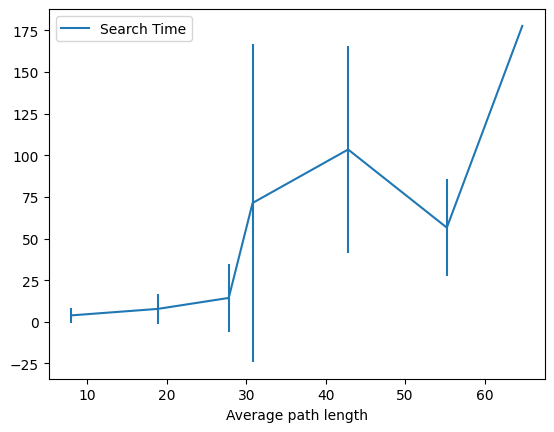

In [23]:
path_df = pd.concat(path_dfs)
Path(save_dir).mkdir(parents=True, exist_ok=True)
path_df.to_csv(Path(save_dir) / "path_df")
mean_df = path_df.groupby(level=0).mean().sort_values("Average path length", ascending=True)
mean_df["std"] = path_df.groupby(level=0).std().sort_values("Average path length", ascending=True)["Search Time"]

mean_df.set_index("Average path length").plot(yerr="std")
mean_df

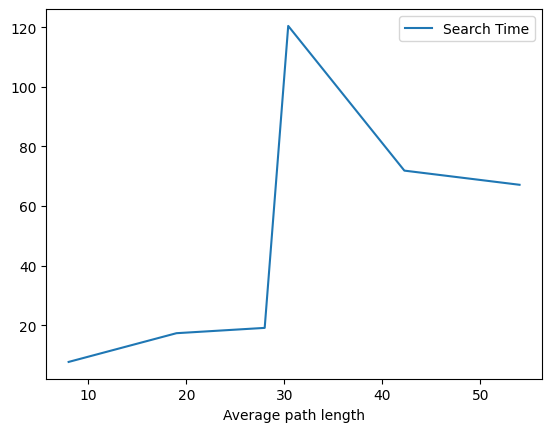

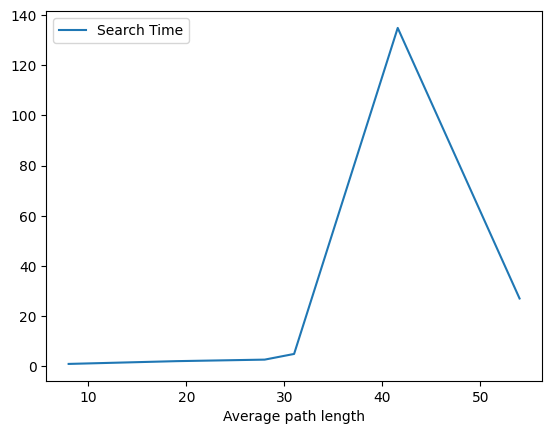

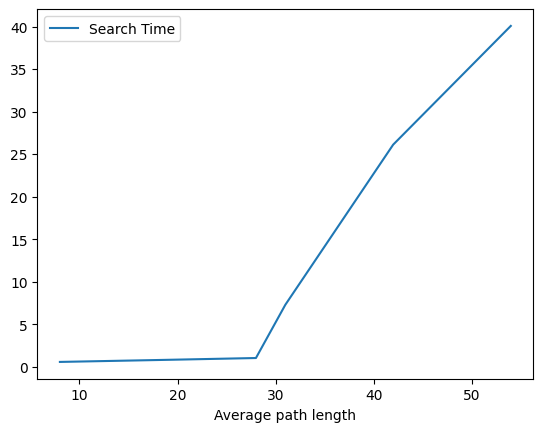

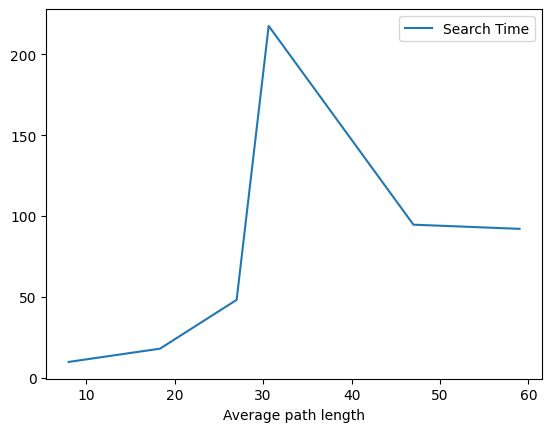

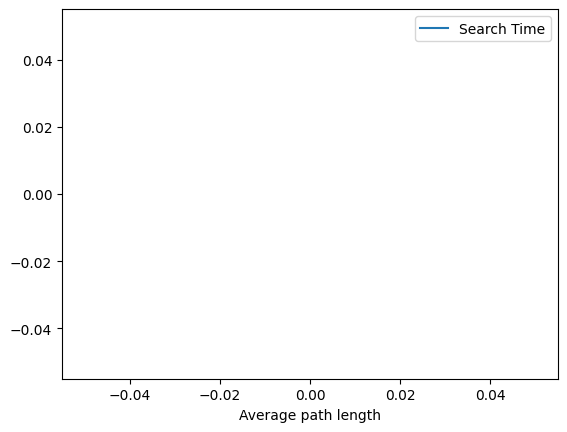

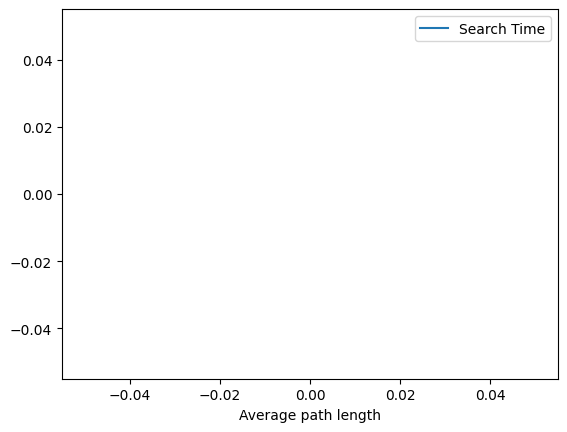

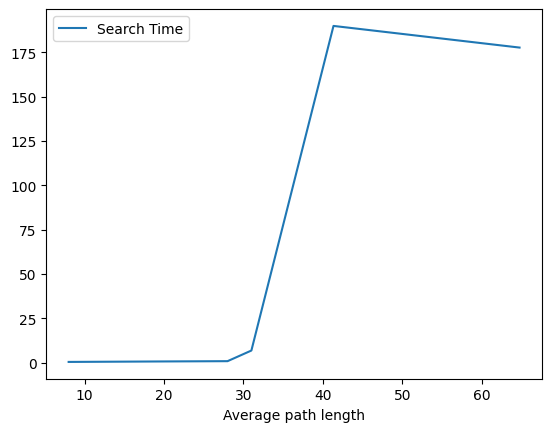

In [24]:
for path_df in path_dfs:
    path_df.sort_values(by="Average path length", ascending=True).set_index("Average path length").plot()
